In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# read files

with open('interbrand_brand2rankvalue.json') as f:
    brand_ranking = json.load(f)
    
with open('google_trends.json') as f:
    google_trends = json.load(f)

data = []

for brand, interest in google_trends.items():
    for year in range(2009, 2020):
        rank = brand_ranking[brand].get(str(year), [101])[0]
        data.append([brand, int(year), rank, interest[str(year-1)], interest[str(year-2)], interest[str(year-3)], interest[str(year-4)], interest[str(year-5)]])

In [3]:
# create dataframe
df = pd.DataFrame(data, columns=['brand', 'year', 'rank(t)', 'google(t-1)', 'google(t-2)', 'google(t-3)', 'google(t-4)', 'google(t-5)'])
df

,brand,year,rank(t),google(t-1),google(t-2),google(t-3),google(t-4),google(t-5)
0,cocacola,2009,1,56.083333,63.750000,61.750000,68.583333,56.416667
1,cocacola,2010,1,37.000000,56.083333,63.750000,61.750000,68.583333
2,cocacola,2011,1,31.833333,37.000000,56.083333,63.750000,61.750000
3,cocacola,2012,1,31.750000,31.833333,37.000000,56.083333,63.750000
4,cocacola,2013,3,30.750000,31.750000,31.833333,37.000000,56.083333
...,...,...,...,...,...,...,...,...
1898,linkedin,2015,101,89.666667,89.000000,71.416667,54.500000,30.416667
1899,linkedin,2016,101,95.500000,89.666667,89.000000,71.416667,54.500000
1900,linkedin,2017,101,82.500000,95.500000,89.666667,89.000000,71.416667
1901,linkedin,2018,101,74.583333,82.500000,95.500000,89.666667,89.000000


In [4]:
# training data split
x_train, x_test, y_train, y_test = \
train_test_split(df[['google(t-1)', 'google(t-2)', 'google(t-3)', 'google(t-4)', 'google(t-5)']], df['rank(t)'], test_size=0.25, random_state=12580)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)
pred_train = model.predict(x_train)
print('mae ', mean_absolute_error(y_train, pred_train))
print('r2 ', r2_score(y_train, pred_train))

mae  28.87044485439831
r2  0.024168076418064288


In [6]:
from statsmodels.api import OLS
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
model = OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rank(t)   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     7.039
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.65e-06
Time:                        08:50:49   Log-Likelihood:                -7014.9
No. Observations:                1427   AIC:                         1.404e+04
Df Residuals:                    1421   BIC:                         1.407e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          83.2592      2.215     37.585      0.000      78.914      87.605
google(t-1)    -0.2485      0.161     -1.539      0.124      -0.565       0.068
google(t-2)     0.2872      0.277      1.036      0.300      -0.257       0.831
google(t-3)    -0.1618      0.294     -0.550      0.583      -0.739       0.416
google(t-4)     0.1464      0.302      0.485      0.628      -0.445       0.738
google(t-5)    -0.2566      0.169     -1.522      0.128      -0.587       0.074
==============================================================================
Omnibus:                      260.172   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.469
Skew:                          -0.713   Prob(JB):                     1.17e-36
Kurtosis:                       2.134   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

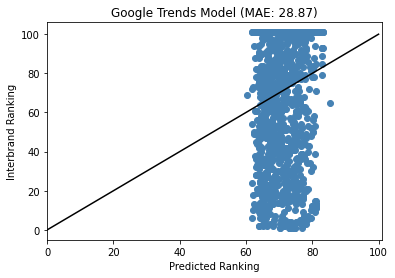

In [7]:
ax = plt.gca()

plt.scatter(pred_train, y_train, color='steelblue')
plt.plot(np.arange(0, 101), np.arange(0, 101), color='black')
plt.title('Google Trends Model (MAE: 28.87)')
plt.xlabel("Predicted Ranking")
plt.ylabel("Interbrand Ranking")
ax.set_xlim((0, 101))
plt.show()